# Classifying Noise sounds using Deep Learning
**By:**
- Shaikha Bin Ateeq 
- Alanoud Alosaimi 
- Raghad Althanyan 

### OverView  :

Following on from the previous notebook, we identifed the following audio properties that need preprocessing to ensure consistency across the whole dataset:
- Audio Channels
- Sample rate
- Bit-depth

also We use Mel-Frequency Cepstral Coefficients(MFCC) and extract it from audio samples.now lets move on to split and Build our model 

**Import Libraries:**

In [2]:
import keras
import pickle
import numpy as np
import pandas as pd
from sklearn import metrics 
import matplotlib.pyplot as plt
from keras.utils import np_utils
from sklearn.utils import shuffle
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report,confusion_matrix 
from tensorflow.keras.layers import InputLayer, BatchNormalization, MaxPooling2D
from keras.callbacks import ModelCheckpoint 
from tensorflow.keras.callbacks import EarlyStopping
from datetime import datetime 
from keras.layers import Dense, Embedding, LSTM, Input, Flatten, Dropout, Activation, Conv1D, Conv2D,MaxPooling1D, AveragePooling1D, GlobalAveragePooling2D

Read The Data From Pickle File:

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
with open('/content/drive/MyDrive/Df_Final.pickle','rb') as read_file:
    df5 = pickle.load(read_file)
    
df5.head(5)

,MFCC,class_name
0,"[[-1.0, -1.0, -0.6859621, -0.4066782, -0.27337...",dog_bark
1,"[[-1.0, -0.92530745, -0.8827135, -0.83456916, ...",children_playing
2,"[[-0.5573074, -0.52561057, -0.62860227, -0.678...",children_playing
3,"[[-0.9489181, -0.8168003, -0.7987346, -0.78233...",children_playing
4,"[[-0.21790166, -0.15364559, -0.22467631, -0.20...",children_playing


In [5]:
df5.shape

(10903, 2)

In [6]:
df = shuffle(df5)

In [7]:
df

,MFCC,class_name
2017,"[[-0.32703415, -0.30962744, -0.32634977, -0.33...",jackhammer
10322,"[[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -0...",Laughter
2554,"[[-0.55797315, -0.39460784, 0.32954752, 0.0515...",children_playing
2374,"[[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...",engine_idling
7367,"[[-1.0, -1.0, -1.0, -1.0, -0.90335524, -0.7447...",dog_bark
...,...,...
8714,"[[-0.3960791, -0.36139658, -0.34552196, -0.330...",children_playing
4050,"[[-0.27938482, -0.20506413, -0.21201873, -0.15...",children_playing
679,"[[-0.6639561, -0.6884442, -0.7704389, -0.85106...",dog_bark
10614,"[[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -0.97019...",Computer_keyboard


In [8]:
df2 = df.reset_index(drop=True)

In [9]:
df2

,MFCC,class_name
0,"[[-0.32703415, -0.30962744, -0.32634977, -0.33...",jackhammer
1,"[[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -0...",Laughter
2,"[[-0.55797315, -0.39460784, 0.32954752, 0.0515...",children_playing
3,"[[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...",engine_idling
4,"[[-1.0, -1.0, -1.0, -1.0, -0.90335524, -0.7447...",dog_bark
...,...,...
10898,"[[-0.3960791, -0.36139658, -0.34552196, -0.330...",children_playing
10899,"[[-0.27938482, -0.20506413, -0.21201873, -0.15...",children_playing
10900,"[[-0.6639561, -0.6884442, -0.7704389, -0.85106...",dog_bark
10901,"[[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -0.97019...",Computer_keyboard


In [10]:
className = df5.class_name.unique() 
className

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling', 'Computer_keyboard', 'Keys_jangling', 'Laughter',
       'Tearing', 'Cough', 'Telephone', 'Bus', 'Scissors',
       'Microwave_oven', 'Fireworks', 'Applause'], dtype=object)

Check all the the data have the same size before feed if to the network

In [ ]:
for i in range(len(check5)):
    #if (len(check2[i]) < 50000):
            print(i, check5[i].shape)
    #print("----------------")

0 (40, 174)
1 (40, 174)
2 (40, 174)
3 (40, 174)
4 (40, 174)
5 (40, 174)
6 (40, 174)
7 (40, 174)
8 (40, 174)
9 (40, 174)
10 (40, 174)
11 (40, 174)
12 (40, 174)
13 (40, 174)
14 (40, 174)
15 (40, 174)
16 (40, 174)
17 (40, 174)
18 (40, 174)
19 (40, 174)
20 (40, 174)
21 (40, 174)
22 (40, 174)
23 (40, 174)
24 (40, 174)
25 (40, 174)
26 (40, 174)
27 (40, 174)
28 (40, 174)
29 (40, 174)
30 (40, 174)
31 (40, 174)
32 (40, 174)
33 (40, 174)
34 (40, 174)
35 (40, 174)
36 (40, 174)
37 (40, 174)
38 (40, 174)
39 (40, 174)
40 (40, 174)
41 (40, 174)
42 (40, 174)
43 (40, 174)
44 (40, 174)
45 (40, 174)
46 (40, 174)
47 (40, 174)
48 (40, 174)
49 (40, 174)
50 (40, 174)
51 (40, 174)
52 (40, 174)
53 (40, 174)
54 (40, 174)
55 (40, 174)
56 (40, 174)
57 (40, 174)
58 (40, 174)
59 (40, 174)
60 (40, 174)
61 (40, 174)
62 (40, 174)
63 (40, 174)
64 (40, 174)
65 (40, 174)
66 (40, 174)
67 (40, 174)
68 (40, 174)
69 (40, 174)
70 (40, 174)
71 (40, 174)
72 (40, 174)
73 (40, 174)
74 (40, 174)
75 (40, 174)
76 (40, 174)
77 (40, 1

### Convert the data and labels

We will use `sklearn.preprocessing.LabelEncoder` to encode the categorical text data into model-understandable numerical data. 

In [11]:
df5.class_name.value_counts()

children_playing     1000
street_music         1000
jackhammer           1000
drilling             1000
dog_bark             1000
air_conditioner      1000
engine_idling        1000
siren                 929
car_horn              429
gun_shot              374
Applause              300
Laughter              300
Fireworks             300
Tearing               300
Cough                 243
Microwave_oven        146
Keys_jangling         139
Telephone             120
Computer_keyboard     119
Bus                   109
Scissors               95
Name: class_name, dtype: int64

In [ ]:
# 0 --> Applause (300)
# 1 --> Bus (109)
# 2 --> Computer_keyboard (119)
# 3 --> Cough (243)
# 4 --> Fireworks (300)
# 5 --> Keys_jangling (139)
# 6 --> Laughter (300)
# 7 --> Microwave_oven (146)
# 8 --> Scissors (95)
# 9 --> Tearing (300)
# 10 --> Telephone (120)
# 11 --> air_conditioner (1000)
# 12 --> car_horn (429)
# 13 --> children_playing (1000)
# 14 --> dog_bark (1000)
# 15 --> drilling (1000)
# 16 --> engine_idling (1000)
# 17 --> gun_shot (374)
# 18 --> jackhammer (1000)
# 19 --> siren (929)
# 20 --> street_music (1000)

In [13]:
df2 = df2.rename(columns={'MFCC': 'MFCC_Padded'})

In [14]:
df2

,MFCC_Padded,class_name
0,"[[-0.32703415, -0.30962744, -0.32634977, -0.33...",jackhammer
1,"[[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -0...",Laughter
2,"[[-0.55797315, -0.39460784, 0.32954752, 0.0515...",children_playing
3,"[[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...",engine_idling
4,"[[-1.0, -1.0, -1.0, -1.0, -0.90335524, -0.7447...",dog_bark
...,...,...
10898,"[[-0.3960791, -0.36139658, -0.34552196, -0.330...",children_playing
10899,"[[-0.27938482, -0.20506413, -0.21201873, -0.15...",children_playing
10900,"[[-0.6639561, -0.6884442, -0.7704389, -0.85106...",dog_bark
10901,"[[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -0.97019...",Computer_keyboard


In [15]:
option=['Scissors','Bus','Computer_keyboard']
df2 = df2[~df2.class_name.isin(option)]

In [16]:
df2.class_name.value_counts()

children_playing    1000
street_music        1000
jackhammer          1000
drilling            1000
dog_bark            1000
air_conditioner     1000
engine_idling       1000
siren                929
car_horn             429
gun_shot             374
Applause             300
Laughter             300
Fireworks            300
Tearing              300
Cough                243
Microwave_oven       146
Keys_jangling        139
Telephone            120
Name: class_name, dtype: int64

In [ ]:
# Convert features and corresponding classification labels into numpy arrays
#X = np.array(df5.MFCC_Padded.tolist())
#y = np.array(df5.class_name.tolist())

# Encode the classification labels
#le = LabelEncoder()
#yy = to_categorical(le.fit_transform(y))

In [17]:
# Convert features and corresponding classification labels into numpy arrays
X = np.array(df2.MFCC_Padded.tolist())
y = np.array(df2.class_name.tolist())

In [18]:
X.shape

(10580, 40, 174)

In [19]:
y.shape

(10580,)

In [20]:
#y.head()
aa = pd.DataFrame(y)
aa

,0
0,jackhammer
1,Laughter
2,children_playing
3,engine_idling
4,dog_bark
...,...
10575,siren
10576,children_playing
10577,children_playing
10578,dog_bark


In [21]:
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y))

In [22]:
yy

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [23]:
#y.head()
ax = pd.DataFrame(yy)
ax

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10575,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10576,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10578,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
num_labels = 18
num_labels

18

### Split the dataset:

In [25]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 42)
X_train , X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=.25, random_state= 42)

In [26]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape, X_test.shape, y_test.shape

((6348, 40, 174),
 (2116, 40, 174),
 (6348, 18),
 (2116, 18),
 (2116, 40, 174),
 (2116, 18))

In [27]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [28]:
#reshaping to shape required by CNN
X_train2=np.reshape(X_train,(X_train.shape[0], 40,174,1))
X_val2=np.reshape(X_val,(X_val.shape[0], 40,174,1))
X_test2=np.reshape(X_test,(X_test.shape[0], 40,174,1))

In [29]:
X_train2.shape, X_val2.shape, y_train.shape, y_val.shape

((6348, 40, 174, 1), (2116, 40, 174, 1), (6348, 18), (2116, 18))

In [30]:
X_train2.shape[1:]

(40, 174, 1)

In [31]:
X_train2.shape

(6348, 40, 174, 1)

In [32]:
y_train.shape

(6348, 18)

In [33]:
X_train.shape[1:]

(40, 174)

**Baseline:**

In [53]:
modelc5 = Sequential()

input_shape=X_train2.shape[1:]

modelc5.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))

modelc5.add(Flatten())

modelc5.add(Dense(100))

modelc5.add(Dense(units = num_labels, activation="softmax"))

modelc5.summary()
modelc5.compile(loss = 'categorical_crossentropy', 
              metrics = ['accuracy'],
              optimizer = 'adam')

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 40, 174, 64)       1664      
                                                                 
 flatten_4 (Flatten)         (None, 445440)            0         
                                                                 
 dense_11 (Dense)            (None, 100)               44544100  
                                                                 
 dense_12 (Dense)            (None, 18)                1818      
                                                                 
Total params: 44,547,582
Trainable params: 44,547,582
Non-trainable params: 0
_________________________________________________________________


In [54]:
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 50, verbose= 1, mode='auto')

checkpointer = ModelCheckpoint(filepath='(new2-base).hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()


modelc5.fit(X_train2, y_train,
          batch_size = 50, 
          epochs = 500,
          validation_data = (X_val2, y_val), 
          callbacks=[checkpointer, es])

Epoch 1/500
127/127 [==============================] - ETA: 0s - loss: 1.8916 - accuracy: 0.4860
Epoch 00001: val_loss improved from inf to 1.35868, saving model to (new2-base).hdf5
127/127 [==============================] - 3s 24ms/step - loss: 1.8916 - accuracy: 0.4860 - val_loss: 1.3587 - val_accuracy: 0.5865
Epoch 2/500
125/127 [============================>.] - ETA: 0s - loss: 1.0265 - accuracy: 0.6901
Epoch 00002: val_loss improved from 1.35868 to 1.24968, saving model to (new2-base).hdf5
127/127 [==============================] - 3s 25ms/step - loss: 1.0284 - accuracy: 0.6900 - val_loss: 1.2497 - val_accuracy: 0.6385
Epoch 3/500
125/127 [============================>.] - ETA: 0s - loss: 0.7668 - accuracy: 0.7736
Epoch 00003: val_loss did not improve from 1.24968
127/127 [==============================] - 2s 16ms/step - loss: 0.7633 - accuracy: 0.7736 - val_loss: 1.3217 - val_accuracy: 0.6347
Epoch 4/500
125/127 [============================>.] - ETA: 0s - loss: 0.5935 - accuracy

**CNN Model**

CNN1D

Experment (1)

In [68]:
modelc9 = Sequential()

input_shape=X_train.shape[1:]

modelc9.add(Conv1D(filters=7, kernel_size=5, padding='same', activation='relu',
                         input_shape=input_shape))
modelc9.add(MaxPooling1D(pool_size=4))
modelc9.add(Dropout(0.5))

modelc9.add(Conv1D(filters=5, kernel_size=5, padding='same', activation='relu',))
modelc9.add(MaxPooling1D(pool_size=4))
modelc9.add(Dropout(0.5))

modelc9.add(Dense(200))
modelc9.add(Dropout(0.5))

modelc9.add(LSTM(64))

modelc9.add(Dense(units = num_labels, activation="softmax"))

modelc9.summary()

modelc9.compile(loss = 'categorical_crossentropy', 
              metrics = ['accuracy'],
              optimizer = 'adam')



Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 40, 7)             6097      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 10, 7)            0         
 1D)                                                             
                                                                 
 dropout_16 (Dropout)        (None, 10, 7)             0         
                                                                 
 conv1d_6 (Conv1D)           (None, 10, 5)             180       
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 2, 5)             0         
 1D)                                                             
                                                                 
 dropout_17 (Dropout)        (None, 2, 5)            

In [69]:
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 50, verbose= 1, mode='auto')

checkpointer = ModelCheckpoint(filepath='1D(2).hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()


modelc9.fit(X_train, y_train,
          batch_size = 50, 
          epochs = 500,
          validation_data = (X_val, y_val), 
          callbacks=[checkpointer, es])

Epoch 1/500
124/127 [============================>.] - ETA: 0s - loss: 2.5519 - accuracy: 0.1298
Epoch 00001: val_loss improved from inf to 2.29789, saving model to 1D(2).hdf5
127/127 [==============================] - 3s 10ms/step - loss: 2.5483 - accuracy: 0.1306 - val_loss: 2.2979 - val_accuracy: 0.1706
Epoch 2/500
122/127 [===========================>..] - ETA: 0s - loss: 2.3344 - accuracy: 0.1687
Epoch 00002: val_loss improved from 2.29789 to 2.20832, saving model to 1D(2).hdf5
127/127 [==============================] - 1s 7ms/step - loss: 2.3337 - accuracy: 0.1679 - val_loss: 2.2083 - val_accuracy: 0.1810
Epoch 3/500
122/127 [===========================>..] - ETA: 0s - loss: 2.2825 - accuracy: 0.1805
Epoch 00003: val_loss improved from 2.20832 to 2.19005, saving model to 1D(2).hdf5
127/127 [==============================] - 1s 7ms/step - loss: 2.2784 - accuracy: 0.1818 - val_loss: 2.1900 - val_accuracy: 0.2037
Epoch 4/500
118/127 [==========================>...] - ETA: 0s - loss:

Experment (2)

In [72]:
modelc10 = Sequential()

input_shape=X_train.shape[1:]

modelc10.add(Conv1D(filters=7, kernel_size=5, padding='same', activation='relu',
                         input_shape=input_shape))
modelc10.add(MaxPooling1D(pool_size=4))
modelc10.add(Dropout(0.5))

modelc10.add(Conv1D(filters=5, kernel_size=5, padding='same', activation='relu',))
modelc10.add(MaxPooling1D(pool_size=4))
modelc10.add(Dropout(0.5))

modelc10.add(Dense(200))
modelc10.add(Dropout(0.5))

modelc10.add(Flatten())


modelc10.add(Dense(units = num_labels, activation="softmax"))

modelc10.summary()

modelc10.compile(loss = 'categorical_crossentropy', 
              metrics = ['accuracy'],
              optimizer = 'adam')



Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_9 (Conv1D)           (None, 40, 7)             6097      
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 10, 7)            0         
 1D)                                                             
                                                                 
 dropout_22 (Dropout)        (None, 10, 7)             0         
                                                                 
 conv1d_10 (Conv1D)          (None, 10, 5)             180       
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 2, 5)             0         
 1D)                                                             
                                                                 
 dropout_23 (Dropout)        (None, 2, 5)            

In [73]:
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 50, verbose= 1, mode='auto')

checkpointer = ModelCheckpoint(filepath='1D(3).hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()


modelc10.fit(X_train, y_train,
          batch_size = 50, 
          epochs = 500,
          validation_data = (X_val, y_val), 
          callbacks=[checkpointer, es])

Epoch 1/500
120/127 [===========================>..] - ETA: 0s - loss: 2.6159 - accuracy: 0.1253
Epoch 00001: val_loss improved from inf to 2.44239, saving model to 1D(3).hdf5
127/127 [==============================] - 1s 7ms/step - loss: 2.6071 - accuracy: 0.1279 - val_loss: 2.4424 - val_accuracy: 0.2457
Epoch 2/500
119/127 [===========================>..] - ETA: 0s - loss: 2.4690 - accuracy: 0.1503
Epoch 00002: val_loss improved from 2.44239 to 2.30698, saving model to 1D(3).hdf5
127/127 [==============================] - 1s 5ms/step - loss: 2.4651 - accuracy: 0.1508 - val_loss: 2.3070 - val_accuracy: 0.2221
Epoch 3/500
119/127 [===========================>..] - ETA: 0s - loss: 2.4039 - accuracy: 0.1671
Epoch 00003: val_loss improved from 2.30698 to 2.28142, saving model to 1D(3).hdf5
127/127 [==============================] - 1s 5ms/step - loss: 2.4020 - accuracy: 0.1670 - val_loss: 2.2814 - val_accuracy: 0.2335
Epoch 4/500
124/127 [============================>.] - ETA: 0s - loss: 

CNN2D

Experment (1)

In [1]:
modelc1 = Sequential()

input_shape=X_train2.shape[1:]

modelc1.add(Conv2D(64, (10, 10), input_shape=input_shape,activation='relu', padding='same'))
modelc1.add(Conv2D(64, (10, 10), activation='relu', padding='same'))
modelc1.add(BatchNormalization())
modelc1.add(MaxPooling2D(pool_size=(2, 2)))

modelc1.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
modelc1.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
modelc1.add(BatchNormalization())
modelc1.add(MaxPooling2D(pool_size=(2, 2)))

modelc1.add(Flatten())

modelc1.add(Dense(200))
modelc1.add(Activation('relu'))
modelc1.add(BatchNormalization())
modelc1.add(Dropout(0.5))


modelc1.add(Dense(100))
modelc1.add(Activation('relu'))
modelc1.add(BatchNormalization())
modelc1.add(Dropout(0.5))


modelc1.add(Dense(50))
modelc1.add(BatchNormalization())
modelc1.add(Activation('relu'))
modelc1.add(Dropout(0.3))


modelc1.add(Dense(units = num_labels, activation="softmax"))

modelc1.summary()

modelc1.compile(loss = 'categorical_crossentropy', 
              metrics = ['accuracy'],
              optimizer = 'adam')

NameError: ignored

In [35]:
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 50, verbose= 1, mode='auto')

checkpointer = ModelCheckpoint(filepath='new2(1-1).hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

modelc1.fit(X_train2, y_train,
          batch_size = 50, 
          epochs = 200,
          validation_data = (X_val2, y_val), 
          callbacks=[checkpointer, es])

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/200
127/127 [==============================] - ETA: 0s - loss: 2.6386 - accuracy: 0.1681
Epoch 00001: val_loss improved from inf to 2.64355, saving model to new2(1-1).hdf5
127/127 [==============================] - 25s 108ms/step - loss: 2.6386 - accuracy: 0.1681 - val_loss: 2.6436 - val_accuracy: 0.1399
Epoch 2/200
127/127 [==============================] - ETA: 0s - loss: 2.1560 - accuracy: 0.2804
Epoch 00002: val_loss improved from 2.64355 to 2.60841, saving model to new2(1-1).hdf5
127/127 [==============================] - 12s 93ms/step - loss: 2.1560 - accuracy: 0.2804 - val_loss: 2.6084 - val_accuracy: 0.1957
Epoch 3/200
127/127 [==============================] - ETA: 0s - loss: 1.9475 - accuracy: 0.3503
Epoch 00003: val_loss did not improve from 2.60841
127/127 [==============================] - 11s 90ms/step - loss: 1.9475 - accuracy: 0.3503 - val_loss: 2.7206 - val_accuracy: 0.2164
Epoch 4/200
127/127 [==============================] - ETA: 0s - loss: 1.7375 - accuracy

Text(0.5, 1.0, 'Training-Validation Accuracy')

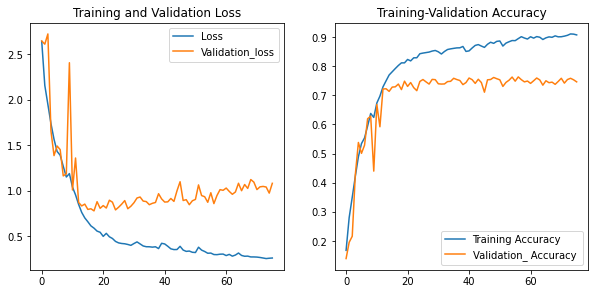

In [36]:
#saving the model history
loss = pd.DataFrame(modelc1.history.history)


#plotting the loss and accuracy 
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(2,2,2)
plt.plot(loss['accuracy'],label = "Training Accuracy")
plt.plot(loss['val_accuracy'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training-Validation Accuracy")

In [37]:
prediction = modelc1.predict(X_val2)

# finding class with larget predicted probability using argmax of numpy 
y_pred = np.argmax(prediction, axis = 1)  # prediction using model 
y_val_orig = np.argmax(y_val, axis = 1) # original y_val
#print(y_pred)

In [38]:
print(classification_report(y_val_orig, y_pred))

              precision    recall  f1-score   support

           0       0.16      0.28      0.20        53
           1       0.24      0.20      0.22        51
           2       0.16      0.27      0.20        51
           3       0.21      0.13      0.16        31
           4       0.21      0.19      0.20        64
           5       0.15      0.13      0.14        30
           6       0.19      0.13      0.15        71
           7       0.20      0.30      0.24        20
           8       0.85      0.94      0.89       214
           9       0.98      0.95      0.96        84
          10       0.74      0.81      0.78       199
          11       0.86      0.79      0.83       227
          12       0.95      0.79      0.86       209
          13       0.91      0.96      0.93       180
          14       0.95      0.90      0.92        67
          15       0.95      0.85      0.90       198
          16       0.89      0.92      0.90       168
          17       0.87    

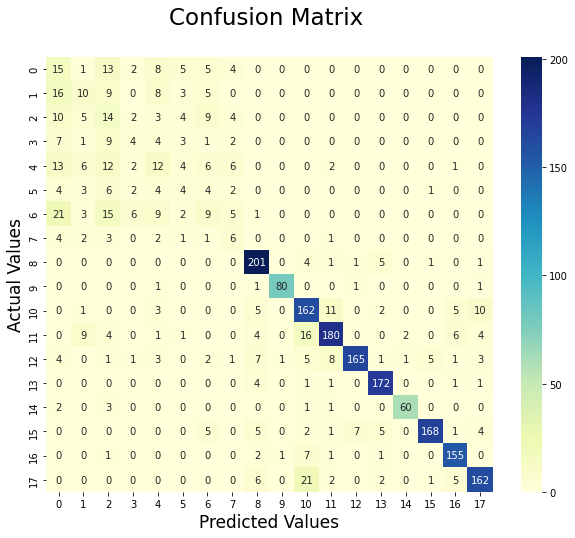

In [39]:
import seaborn as sns
cnf_matrix = metrics.confusion_matrix(y_val_orig, y_pred)
plt.figure(figsize=(10,8))
ax= plt.subplot()
sns.heatmap(cnf_matrix,annot=True, fmt='.5g', ax=ax,cmap="YlGnBu");
plt.rcParams.update({'font.size': 30});
ax.set_xlabel('Predicted Values', fontsize=17, color='Black');
ax.set_ylabel('Actual Values',fontsize=17, color='Black'); 
ax.set_title('Confusion Matrix \n', color='Black', fontsize=23);

Experment (2)

In [40]:
modelc2 = Sequential()

modelc2.add(InputLayer(input_shape=X_train2.shape[1:]))

modelc2.add(Conv2D(filters=10, kernel_size=3, activation='relu', padding='same'))
modelc2.add(Conv2D(filters=16, kernel_size=3, activation='relu', padding='same'))
modelc2.add(MaxPooling2D())
modelc2.add(Dropout(0.5))

modelc2.add(Conv2D(filters=20, kernel_size=3, activation='relu', padding='same'))
modelc2.add(Conv2D(filters=16, kernel_size=3, activation='relu', padding='same'))
modelc2.add(MaxPooling2D())
modelc2.add(Dropout(0.5))

modelc2.add(Conv2D(filters=30, kernel_size=3, activation='relu', padding='same'))
modelc2.add(GlobalAveragePooling2D())

# Fully connected block - flattening followed by dense and output layers
modelc2.add(Flatten())
modelc2.add(Dense(30, activation='relu'))

#final layer
# add neural network so flatten the output comming from last layer of cnn model 
modelc2.add(Dense(units = num_labels, activation="softmax"))

modelc2.summary()

modelc2.compile(loss = 'categorical_crossentropy', 
              metrics = ['accuracy'],
              optimizer = 'adam')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 40, 174, 10)       100       
                                                                 
 conv2d_5 (Conv2D)           (None, 40, 174, 16)       1456      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 20, 87, 16)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 20, 87, 16)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 87, 20)        2900      
                                                                 
 conv2d_7 (Conv2D)           (None, 20, 87, 16)        2896      
                                                      

In [41]:
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 50, verbose= 1, mode='auto')

checkpointer = ModelCheckpoint(filepath='new2(2).hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

modelc2.fit(X_train2, y_train,
          batch_size = 50, 
          epochs = 1000,
          validation_data = (X_val2, y_val), 
          callbacks=[checkpointer, es])

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/1000
127/127 [==============================] - ETA: 0s - loss: 2.5910 - accuracy: 0.1374
Epoch 00001: val_loss improved from inf to 2.39289, saving model to new2(2).hdf5
127/127 [==============================] - 2s 11ms/step - loss: 2.5910 - accuracy: 0.1374 - val_loss: 2.3929 - val_accuracy: 0.1583
Epoch 2/1000
127/127 [==============================] - ETA: 0s - loss: 2.3099 - accuracy: 0.2109
Epoch 00002: val_loss improved from 2.39289 to 2.19697, saving model to new2(2).hdf5
127/127 [==============================] - 1s 9ms/step - loss: 2.3099 - accuracy: 0.2109 - val_loss: 2.1970 - val_accuracy: 0.2651
Epoch 3/1000
127/127 [==============================] - ETA: 0s - loss: 2.0818 - accuracy: 0.2711
Epoch 00003: val_loss improved from 2.19697 to 1.99485, saving model to new2(2).hdf5
127/127 [==============================] - 1s 9ms/step - loss: 2.0818 - accuracy: 0.2711 - val_loss: 1.9948 - val_accuracy: 0.2760
Epoch 4/1000
127/127 [==============================] - ETA: 

In [42]:
prediction = modelc2.predict(X_val2)

# finding class with larget predicted probability using argmax of numpy 
y_pred = np.argmax(prediction, axis = 1)  # prediction using model 
y_val_orig = np.argmax(y_val, axis = 1) # original y_val
#print(y_pred)

In [43]:
print(classification_report(y_val_orig, y_pred))

              precision    recall  f1-score   support

           0       0.14      0.09      0.11        53
           1       0.29      0.33      0.31        51
           2       0.12      0.16      0.13        51
           3       0.28      0.42      0.34        31
           4       0.25      0.19      0.21        64
           5       0.00      0.00      0.00        30
           6       0.31      0.15      0.21        71
           7       1.00      0.05      0.10        20
           8       0.93      0.82      0.87       214
           9       0.71      0.90      0.80        84
          10       0.63      0.85      0.72       199
          11       0.85      0.67      0.75       227
          12       0.81      0.80      0.80       209
          13       0.89      0.89      0.89       180
          14       0.59      0.96      0.73        67
          15       0.88      0.90      0.89       198
          16       0.83      0.93      0.88       168
          17       0.83    

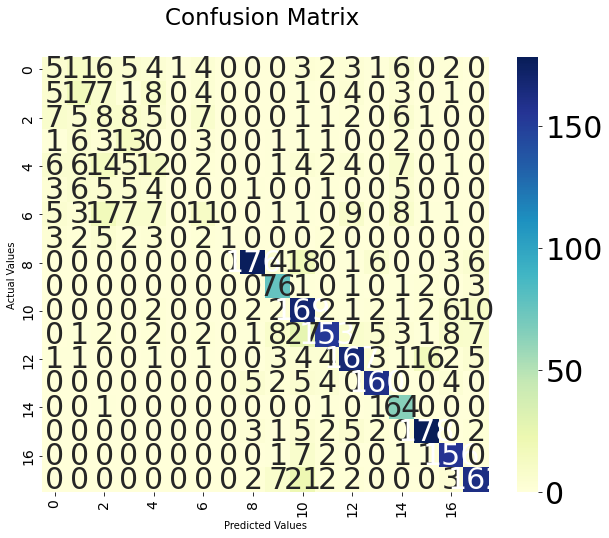

In [44]:
import seaborn as sns
cnf_matrix = metrics.confusion_matrix(y_val_orig, y_pred)
plt.figure(figsize=(10,8))
ax= plt.subplot()

sns.heatmap(cnf_matrix,annot=True, fmt='.5g', ax=ax,cmap="YlGnBu");
plt.rcParams.update({'font.size': 30});
ax.set_xlabel('Predicted Values', fontsize=10, color='Black');
ax.set_ylabel('Actual Values',fontsize=10, color='Black'); 
plt.xticks(fontsize=14, rotation=90);
plt.yticks(fontsize=14, rotation=90);

ax.set_title('Confusion Matrix \n', color='Black', fontsize=23);

Experment (3)

In [45]:
modelc3 = Sequential()

input_shape=X_train2.shape[1:]

modelc3.add(Conv2D(64, (10, 10), input_shape=input_shape,activation='relu', padding='same'))
modelc3.add(Conv2D(64, (10, 10), activation='relu', padding='same'))
modelc3.add(BatchNormalization())
modelc3.add(MaxPooling2D(pool_size=(2, 2)))

modelc3.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
modelc3.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
modelc3.add(BatchNormalization())
modelc3.add(MaxPooling2D(pool_size=(2, 2)))

modelc3.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
modelc3.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
modelc3.add(BatchNormalization())
modelc3.add(MaxPooling2D(pool_size=(2, 2)))

modelc3.add(Flatten())

modelc3.add(Dense(200))
modelc3.add(Activation('relu'))
modelc3.add(BatchNormalization())
modelc3.add(Dropout(0.8))


modelc3.add(Dense(100))
modelc3.add(Activation('relu'))
modelc3.add(BatchNormalization())
modelc3.add(Dropout(0.6))


modelc3.add(Dense(50))
modelc3.add(BatchNormalization())
modelc3.add(Activation('relu'))
modelc3.add(Dropout(0.3))


modelc3.add(Dense(units = num_labels, activation="softmax"))

modelc3.summary()

modelc3.compile(loss = 'categorical_crossentropy', 
              metrics = ['accuracy'],
              optimizer = 'adam')



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 40, 174, 64)       6464      
                                                                 
 conv2d_10 (Conv2D)          (None, 40, 174, 64)       409664    
                                                                 
 batch_normalization_5 (Batc  (None, 40, 174, 64)      256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 20, 87, 64)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 20, 87, 128)       204928    
                                                                 
 conv2d_12 (Conv2D)          (None, 20, 87, 128)      

In [46]:
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 50, verbose= 1, mode='auto')

checkpointer = ModelCheckpoint(filepath='new2(3).hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()


modelc3.fit(X_train2, y_train,
          batch_size = 100, 
          epochs = 500,
          validation_data = (X_val2, y_val), 
          callbacks=[checkpointer, es])

Epoch 1/500
64/64 [==============================] - ETA: 0s - loss: 2.8909 - accuracy: 0.1153
Epoch 00001: val_loss improved from inf to 2.77273, saving model to new2(3).hdf5
64/64 [==============================] - 23s 272ms/step - loss: 2.8909 - accuracy: 0.1153 - val_loss: 2.7727 - val_accuracy: 0.1319
Epoch 2/500
64/64 [==============================] - ETA: 0s - loss: 2.5974 - accuracy: 0.1591
Epoch 00002: val_loss improved from 2.77273 to 2.71934, saving model to new2(3).hdf5
64/64 [==============================] - 17s 262ms/step - loss: 2.5974 - accuracy: 0.1591 - val_loss: 2.7193 - val_accuracy: 0.1078
Epoch 3/500
64/64 [==============================] - ETA: 0s - loss: 2.3937 - accuracy: 0.1957
Epoch 00003: val_loss did not improve from 2.71934
64/64 [==============================] - 17s 258ms/step - loss: 2.3937 - accuracy: 0.1957 - val_loss: 2.7501 - val_accuracy: 0.0912
Epoch 4/500
64/64 [==============================] - ETA: 0s - loss: 2.2465 - accuracy: 0.2372
Epoch 0

Text(0.5, 1.0, 'Training-Validation Accuracy')

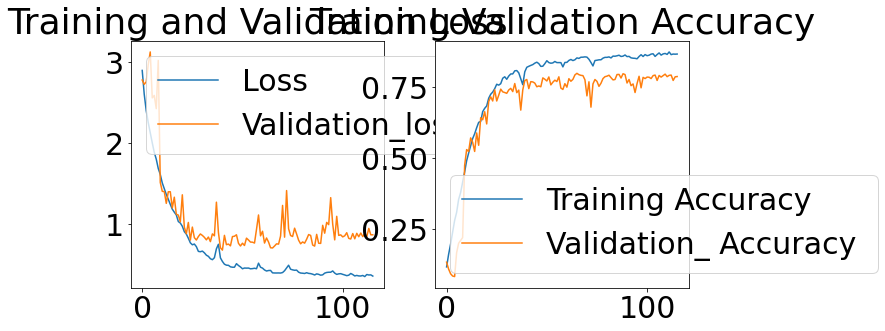

In [47]:
#saving the model history
loss = pd.DataFrame(modelc3.history.history)


#plotting the loss and accuracy 
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(2,2,2)
plt.plot(loss['accuracy'],label = "Training Accuracy")
plt.plot(loss['val_accuracy'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training-Validation Accuracy")

In [48]:
prediction = modelc3.predict(X_val2)

# finding class with larget predicted probability using argmax of numpy 
y_pred = np.argmax(prediction, axis = 1)  # prediction using model 
y_val_orig = np.argmax(y_val, axis = 1) # original y_val
#print(y_pred)

In [49]:
print(classification_report(y_val_orig, y_pred))

              precision    recall  f1-score   support

           0       0.13      0.09      0.11        53
           1       0.25      0.06      0.10        51
           2       0.19      0.55      0.28        51
           3       0.00      0.00      0.00        31
           4       0.22      0.42      0.29        64
           5       0.00      0.00      0.00        30
           6       0.28      0.34      0.30        71
           7       0.00      0.00      0.00        20
           8       0.92      0.98      0.95       214
           9       0.95      0.95      0.95        84
          10       0.81      0.89      0.85       199
          11       0.92      0.81      0.86       227
          12       0.95      0.83      0.88       209
          13       0.98      0.98      0.98       180
          14       0.95      0.93      0.94        67
          15       0.90      0.95      0.93       198
          16       0.94      0.97      0.96       168
          17       0.95    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


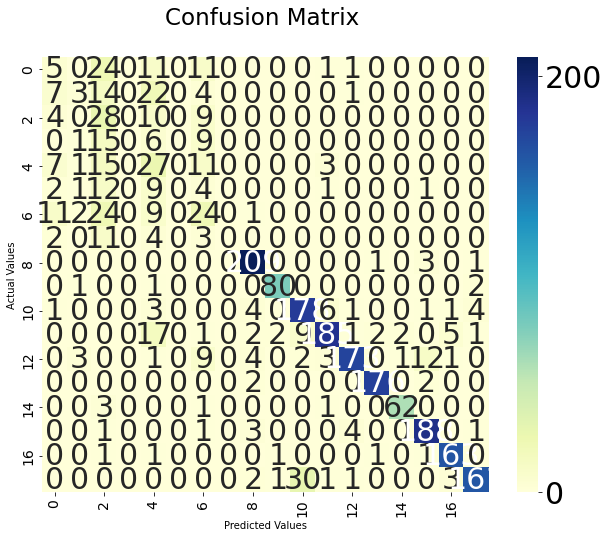

In [50]:
import seaborn as sns
cnf_matrix = metrics.confusion_matrix(y_val_orig, y_pred)
plt.figure(figsize=(10,8))
ax= plt.subplot()

sns.heatmap(cnf_matrix,annot=True, fmt='.5g', ax=ax,cmap="YlGnBu");
plt.rcParams.update({'font.size': 1000});
ax.set_xlabel('Predicted Values', fontsize=10, color='Black');
ax.set_ylabel('Actual Values',fontsize=10, color='Black'); 
plt.xticks(fontsize=14, rotation=90);
plt.yticks(fontsize=14, rotation=90);

ax.set_title('Confusion Matrix \n', color='Black', fontsize=23);

Experment (4)

In [51]:
modelc4 = Sequential()

input_shape=X_train2.shape[1:]

modelc4.add(Conv2D(filters=16, kernel_size=2, input_shape=input_shape, activation='relu'))
modelc4.add(MaxPooling2D(pool_size=(2,2)))
modelc4.add(Dropout(0.8))

modelc4.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
modelc4.add(MaxPooling2D(pool_size=(2,2)))
modelc4.add(Dropout(0.5))

modelc4.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
modelc4.add(MaxPooling2D(pool_size=(2,2)))
modelc4.add(Dropout(0.5))

modelc4.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
modelc4.add(MaxPooling2D(pool_size=(2,2)))
modelc4.add(Dropout(0.4))
modelc4.add(GlobalAveragePooling2D())
modelc4.add(Flatten())

modelc4.add(Dense(units = num_labels, activation="softmax"))

modelc4.summary()

modelc4.compile(loss = 'categorical_crossentropy', 
              metrics = ['accuracy'],
              optimizer = 'adam')



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 39, 173, 16)       80        
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 19, 86, 16)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 19, 86, 16)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 18, 85, 32)        2080      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 9, 42, 32)        0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 9, 42, 32)        

In [52]:
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 50, verbose= 1, mode='auto')

checkpointer = ModelCheckpoint(filepath='new2(4).hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()


modelc4.fit(X_train2, y_train,
          batch_size = 50, 
          epochs = 500,
          validation_data = (X_val2, y_val), 
          callbacks=[checkpointer, es])

Epoch 1/500
127/127 [==============================] - ETA: 0s - loss: 2.4577 - accuracy: 0.1623
Epoch 00001: val_loss improved from inf to 2.63796, saving model to new2(4).hdf5
127/127 [==============================] - 2s 13ms/step - loss: 2.4577 - accuracy: 0.1623 - val_loss: 2.6380 - val_accuracy: 0.2112
Epoch 2/500
123/127 [============================>.] - ETA: 0s - loss: 2.2167 - accuracy: 0.2522
Epoch 00002: val_loss improved from 2.63796 to 2.49812, saving model to new2(4).hdf5
127/127 [==============================] - 1s 11ms/step - loss: 2.2120 - accuracy: 0.2535 - val_loss: 2.4981 - val_accuracy: 0.2306
Epoch 3/500
126/127 [============================>.] - ETA: 0s - loss: 2.0473 - accuracy: 0.3029
Epoch 00003: val_loss improved from 2.49812 to 2.47906, saving model to new2(4).hdf5
127/127 [==============================] - 1s 11ms/step - loss: 2.0445 - accuracy: 0.3043 - val_loss: 2.4791 - val_accuracy: 0.2405
Epoch 4/500
123/127 [============================>.] - ETA: 0s

## **LSTM**

Experment (1)

In [55]:
modelc6 = Sequential()

input_shape=X_train.shape[1:]

modelc6.add(LSTM(64, activation='relu', return_sequences=True, input_shape=input_shape, recurrent_dropout=.1))
modelc6.add(LSTM(64, activation='relu'))

modelc6.add(Dense(200))
modelc6.add(Dropout(0.5))

modelc6.add(Dense(100))
modelc6.add(Dropout(0.5))

modelc6.add(Dense(50))
modelc6.add(Dropout(0.2))

modelc6.add(Dense(units = num_labels, activation="softmax"))


modelc6.summary()
modelc6.compile(loss = 'categorical_crossentropy', 
              metrics = ['accuracy'],
              optimizer = 'adam')

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 40, 64)            61184     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_13 (Dense)            (None, 200)               13000     
                                                                 
 dropout_12 (Dropout)        (None, 200)               0         
                                                                 
 dense_14 (Dense)            (None, 100)               20100     
                                                                 
 dropout_13 (Dropout)        (None, 100)               0         
                                                                 
 dense_15 (Dense)            (None, 50)               

In [56]:
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 50, verbose= 1, mode='auto')

checkpointer = ModelCheckpoint(filepath='(new2-LSTM(1)).hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()


modelc6.fit(X_train, y_train,
          batch_size = 50, 
          epochs = 500,
          validation_data = (X_val, y_val), 
          callbacks=[checkpointer, es])

Epoch 1/500
127/127 [==============================] - ETA: 0s - loss: 2.5805 - accuracy: 0.1320
Epoch 00001: val_loss improved from inf to 2.31795, saving model to (new2-LSTM(1)).hdf5
127/127 [==============================] - 22s 155ms/step - loss: 2.5805 - accuracy: 0.1320 - val_loss: 2.3180 - val_accuracy: 0.2070
Epoch 2/500
127/127 [==============================] - ETA: 0s - loss: 2.2399 - accuracy: 0.2172
Epoch 00002: val_loss improved from 2.31795 to 2.02581, saving model to (new2-LSTM(1)).hdf5
127/127 [==============================] - 19s 152ms/step - loss: 2.2399 - accuracy: 0.2172 - val_loss: 2.0258 - val_accuracy: 0.2717
Epoch 3/500
127/127 [==============================] - ETA: 0s - loss: 2.0513 - accuracy: 0.2541
Epoch 00003: val_loss improved from 2.02581 to 1.87739, saving model to (new2-LSTM(1)).hdf5
127/127 [==============================] - 19s 152ms/step - loss: 2.0513 - accuracy: 0.2541 - val_loss: 1.8774 - val_accuracy: 0.2968
Epoch 4/500
127/127 [==============

Experment (2)

In [59]:
modelc7 = Sequential()

input_shape=X_train.shape[1:]

#modelc6.add(Conv2D(filters=16, kernel_size=2, input_shape=input_shape, activation='relu'))
modelc7.add(LSTM(64, activation='relu', return_sequences=True, input_shape=input_shape, recurrent_dropout=.1))
modelc7.add(LSTM(50, activation='relu'))


#modelc7.add(Flatten())

#modelc7.add(Dense(100))
#modelc7.add(Activation('relu'))
#modelc7.add(BatchNormalization())
#modelc7.add(Dropout(0.5))

modelc7.add(Dense(200))
modelc7.add(Dropout(0.5))


#modelc6.add(LSTM(50, activation='relu'))

modelc7.add(Dense(units = num_labels, activation="softmax"))


modelc7.summary()
modelc7.compile(loss = 'categorical_crossentropy', 
              metrics = ['accuracy'],
              optimizer = 'adam')

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 40, 64)            61184     
                                                                 
 lstm_5 (LSTM)               (None, 50)                23000     
                                                                 
 dense_19 (Dense)            (None, 200)               10200     
                                                                 
 dropout_15 (Dropout)        (None, 200)               0         
                                                                 
 dense_20 (Dense)            (None, 18)                3618      
                                                                 
Total params: 98,002
Trainable params: 98,002
Non-trainable params: 0
_________________________________________________________________


In [60]:
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 50, verbose= 1, mode='auto')

checkpointer = ModelCheckpoint(filepath='(new2-LSTM(2-1)).hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()


modelc7.fit(X_train, y_train,
          batch_size = 50, 
          epochs = 500,
          validation_data = (X_val, y_val), 
          callbacks=[checkpointer, es])

Epoch 1/500
127/127 [==============================] - ETA: 0s - loss: 2.7177 - accuracy: 0.1150
Epoch 00001: val_loss improved from inf to 2.50334, saving model to (new2-LSTM(2-1)).hdf5
127/127 [==============================] - 22s 157ms/step - loss: 2.7177 - accuracy: 0.1150 - val_loss: 2.5033 - val_accuracy: 0.1711
Epoch 2/500
127/127 [==============================] - ETA: 0s - loss: 2.3536 - accuracy: 0.1846
Epoch 00002: val_loss improved from 2.50334 to 2.20924, saving model to (new2-LSTM(2-1)).hdf5
127/127 [==============================] - 19s 153ms/step - loss: 2.3536 - accuracy: 0.1846 - val_loss: 2.2092 - val_accuracy: 0.2273
Epoch 3/500
127/127 [==============================] - ETA: 0s - loss: 2.1995 - accuracy: 0.2199
Epoch 00003: val_loss improved from 2.20924 to 2.12949, saving model to (new2-LSTM(2-1)).hdf5
127/127 [==============================] - 19s 152ms/step - loss: 2.1995 - accuracy: 0.2199 - val_loss: 2.1295 - val_accuracy: 0.2552
Epoch 4/500
127/127 [========